# pandas - outliers

- to identify 
  -  check Δ(median, mean)
  -  histogram -> see the tails
- to handle
  - IQR
  - anomaly detection 

for more [details](https://github.com/tansudasli/tensorflow-sandbox/wiki/understanding-the-data)


> Note
> abalone file is the split version of train & test. So probably already cleaned. if we drop outliers, we loose c.50% of _age_, which will eventually make problems!
>
> So, This is just for _the sake of outlier identification and handling_ quest!


In [1]:
import pandas as pd
import seaborn as sns

abaloneFile = "./dataset/abalone.parquet"
abaloneNonOutlierFile = "./dataset/abaloneNonOutlier.parquet"
dfAbalone = pd.read_parquet(abaloneFile)

In [2]:
print(dfAbalone.head(3).transpose())

                     0       1        2
length          0.4350  0.5850   0.6550
diameter        0.3350  0.4500   0.5100
height          0.1100  0.1250   0.1600
whole_weight    0.3340  0.8740   1.0920
shucked_weight  0.1355  0.3545   0.3960
viscera_weight  0.0775  0.2075   0.2825
shell_weight    0.0965  0.2250   0.3700
age             7.0000  6.0000  14.0000


## to identify

In [22]:
# understand outliers
# check Δ(median, mean)
# histogram -> see the tails

dfAbaloneStats = dfAbalone.describe(include="all")

# loc[index, column]
print(dfAbaloneStats.loc[:, ["length", "diameter", "height", "age"]])

            length     diameter       height          age
count  3320.000000  3320.000000  3320.000000  3320.000000
mean      0.522693     0.406575     0.139271     9.896988
std       0.121164     0.100120     0.042708     3.205654
min       0.075000     0.055000     0.000000     1.000000
25%       0.450000     0.345000     0.115000     8.000000
50%       0.540000     0.425000     0.140000     9.000000
75%       0.615000     0.480000     0.165000    11.000000
max       0.815000     0.650000     1.130000    27.000000


array([[<Axes: xlabel='length', ylabel='length'>,
        <Axes: xlabel='diameter', ylabel='length'>,
        <Axes: xlabel='height', ylabel='length'>,
        <Axes: xlabel='whole_weight', ylabel='length'>,
        <Axes: xlabel='shucked_weight', ylabel='length'>,
        <Axes: xlabel='viscera_weight', ylabel='length'>,
        <Axes: xlabel='shell_weight', ylabel='length'>,
        <Axes: xlabel='age', ylabel='length'>],
       [<Axes: xlabel='length', ylabel='diameter'>,
        <Axes: xlabel='diameter', ylabel='diameter'>,
        <Axes: xlabel='height', ylabel='diameter'>,
        <Axes: xlabel='whole_weight', ylabel='diameter'>,
        <Axes: xlabel='shucked_weight', ylabel='diameter'>,
        <Axes: xlabel='viscera_weight', ylabel='diameter'>,
        <Axes: xlabel='shell_weight', ylabel='diameter'>,
        <Axes: xlabel='age', ylabel='diameter'>],
       [<Axes: xlabel='length', ylabel='height'>,
        <Axes: xlabel='diameter', ylabel='height'>,
        <Axes: xlabel='hei

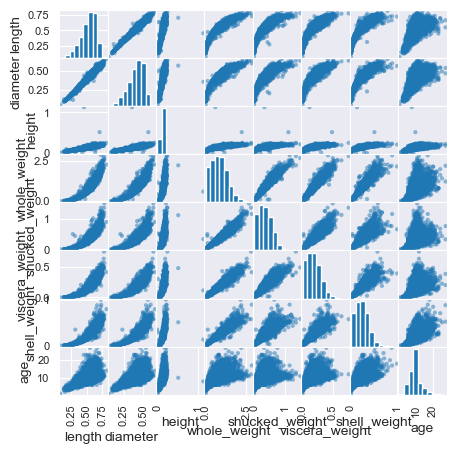

In [50]:
# histogram -> see tails
# there are outliers

pd.plotting.scatter_matrix(frame=dfAbalone, figsize=(5,5))
# sns.pairplot(data=dfAbalone, height=3)

<Axes: >

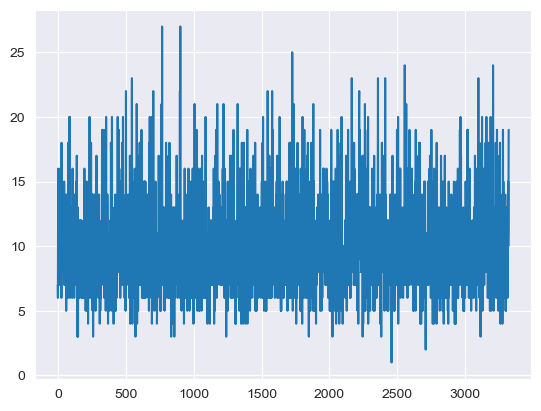

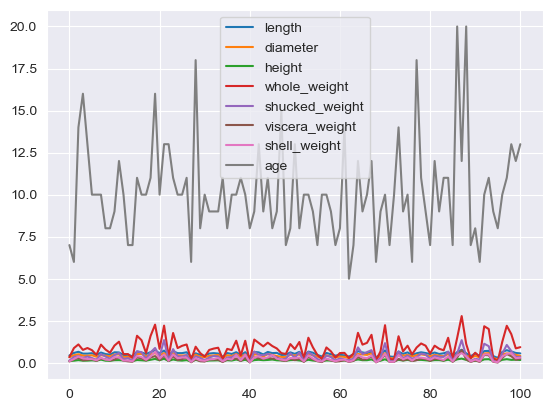

In [26]:
# get a common sense
# dfAbalone.plot()
# dfAbalone.age.plot()
dfAbalone.loc[0:100].plot()

## to handle

In [51]:
# handle outliers
# 1- IQR
# 2- Anomaly detection


### IQR - inter quartile range

In [36]:
# outlier (inter quartile method)
# [lower, upper] range is normal distribution, else outlier

def mark_outliers(df):
    q3 = df.quantile(0.75)
    q1 = df.quantile(0.25)

    iqr = q3 -q1

    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr

    # does not filter!. just puts null values..
    # so, we have to dropna()
    # we are sending a df, so it does not filter!!!
    outliers = df[(df < upper) & (df > lower)]

    return outliers


# value-based filtering
# we are sending a series, so it filters
# dfAbaloneOutlierEliminated = dfAbalone[(dfAbalone.viscera_weight < upper) & (dfAbalone.viscera_weight > lower)]
dfAbaloneNonOutlier = mark_outliers(dfAbalone).dropna()

print(dfAbalone.shape, dfAbaloneNonOutlier.shape)

(3320, 8) (3012, 8)


3320 3012
26 12


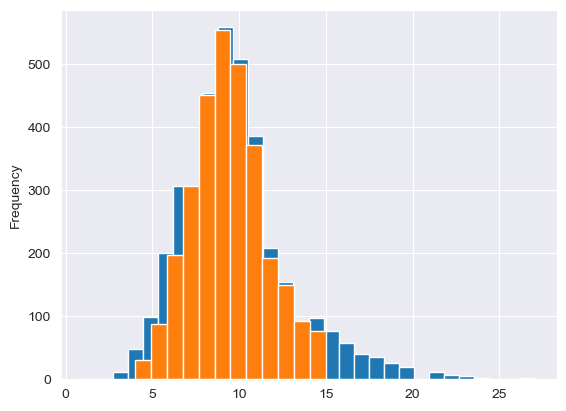

In [37]:
# 50% of age data lost !!!
# It's wild

dfAbalone.age.plot(kind="hist", bins=30)
dfAbaloneNonOutlier.age.plot(kind="hist", bins=12)

print(dfAbalone.age.size, dfAbaloneNonOutlier.age.size)
print(dfAbalone.age.value_counts().size, dfAbaloneNonOutlier.age.value_counts().size)

In [38]:
# save non-outliers to file

dfAbaloneNonOutlier.to_parquet(abaloneNonOutlierFile)

### Anomaly Detection

In [55]:
# todo: impl outlier detection w/ anomaly algorithms